In [1]:
import numpy as np
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import * #BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
train_path = 'CarneDataset/train'
test_path = 'CarneDataset/test'
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['CLASS_01', 'CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08'], batch_size=27)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['CLASS_01', 'CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08'], batch_size=9)

Found 1633 images belonging to 8 classes.
Found 810 images belonging to 8 classes.


In [3]:
def plots(ims, figsize=(20,6), rows=2, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')



In [4]:
imgs, labels = next(train_batches)


C:\Users\jespinoza\AppData\Local\anaconda3\lib\site-packages\matplotlib\text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


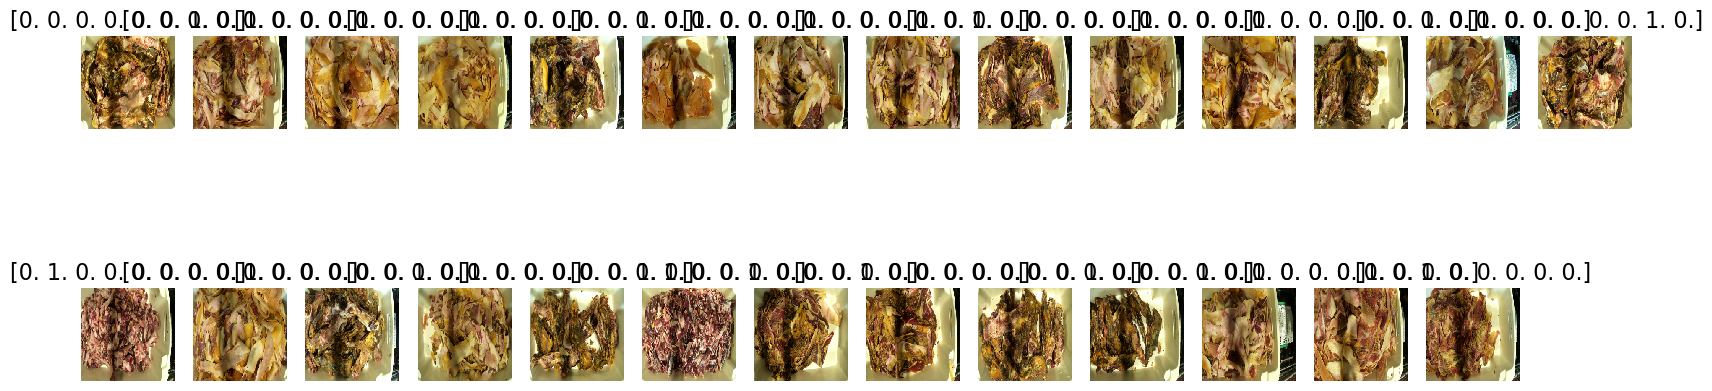

In [5]:
plots(imgs, titles=labels)


In [6]:
train_batches.class_indices

{'CLASS_01': 0,
 'CLASS_02': 1,
 'CLASS_03': 2,
 'CLASS_04': 3,
 'CLASS_05': 4,
 'CLASS_06': 5,
 'CLASS_07': 6,
 'CLASS_08': 7}

In [7]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [8]:
import tensorflow as tf

In [9]:
tf.keras.applications.vgg16.VGG16(
    include_top=True,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation='softmax'
)

In [10]:
vgg16_model = keras.applications.vgg16.VGG16()
vgg16_model.summary()
type(vgg16_model)


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

keras.engine.functional.Functional

In [11]:
keras.engine.training.Model


keras.engine.training.Model

In [12]:
model = Sequential()
for i in vgg16_model.layers:
    model.add(i)

In [13]:
model.summary()
model.layers.pop()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [14]:
for layer in model.layers:
    layer.trainable = False

In [15]:
model.add(Dense(8, activation='softmax'))

In [16]:
model.summary()
model.compile(Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

C:\Users\jespinoza\AppData\Local\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [17]:
model.save_weights('model_weights.h5')


[[0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]
[[0.12900735 0.12412833 0.12416264 0.12628436 0.13048613 0.11895153
  0.12371457 0.12326512]
 [0.12467882 0.1252164  0.1254755  0.12245269 0.12498336 0.12750737
  0.12539877 0.12428703]
 [0.12651114 0.12559009 0.12532742 0.12488811 0.12600803 0.12307248
  0.12568088 0.12292185]
 [0.12434589 0.12861988 0.13144429 0.12188852 0.1215314  0.12142849
  0.13176449 0.118977  ]
 [0.12855881 0.12278131 0.1289867  0.1218625  0.12583958 0.12466701
  0.12448987 0.12281419]
 [0.1278664  0.121728   0.12849991 0.12243589 0.12755209 0.12585281
  0.12239584 0.12366903]
 [0.12883258 0.12564804 0.12874272 0.12070272 0.12319949 0.12603146
  0.12510465 0.12173835]
 [0.12678629 0.12141237 0.12711197 0.1240873  0.12583566 0.12484845
  0.1256262  0.12429174]
 [0.12764609

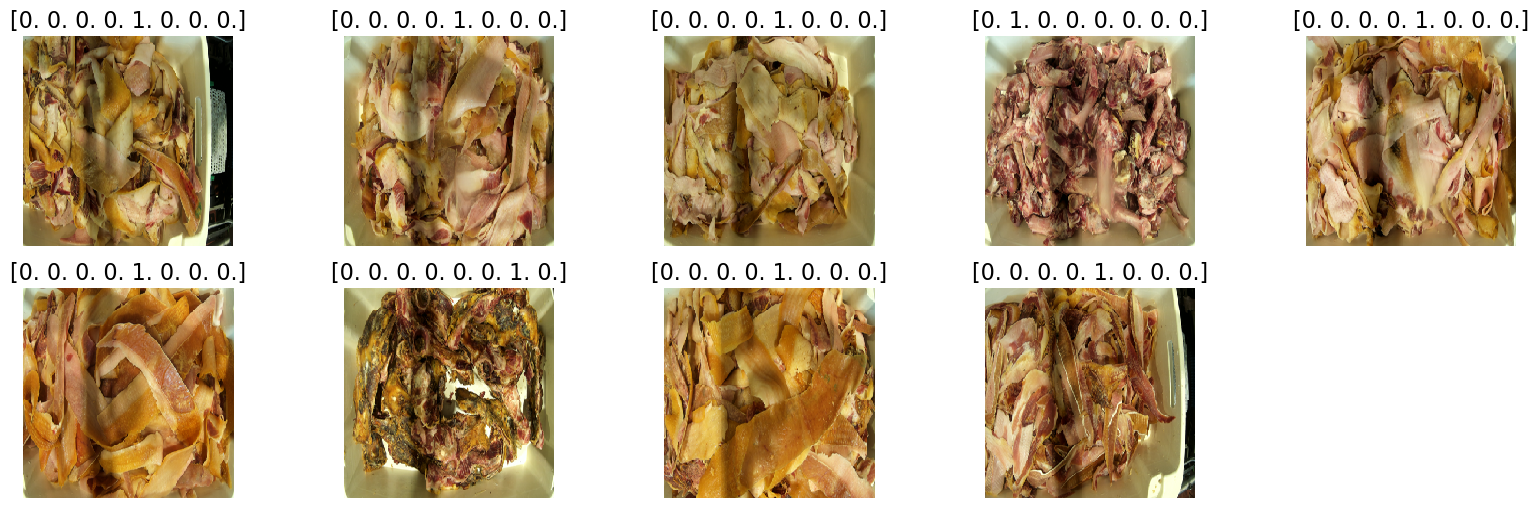

In [18]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)
print(test_labels)
predictions = model.predict_on_batch(np.array(test_imgs))
print(predictions)
test_labels = np.array(test_labels.argmax(axis=1))
predictions = np.array(predictions.argmax(axis=1))


In [19]:
print(test_labels)
print(predictions)


[4 4 4 1 4 4 6 4 4]
[4 5 0 6 2 2 0 2 2]


In [20]:
cm = confusion_matrix(test_labels, predictions)


In [21]:
cm_plot_labels = ['CLASS_01', 'CLASS_02', 'CLASS_03', 'CLASS_04', 'CLASS_05', 'CLASS_06', 'CLASS_07', 'CLASS_08']
if 0 not in test_labels and 0 not in predictions:
    cm_plot_labels.remove('CLASS_01')
if 1 not in test_labels and 1 not in predictions:
    cm_plot_labels.remove('CLASS_02')
if 2 not in test_labels and 2 not in predictions:
    cm_plot_labels.remove('CLASS_03')
if 3 not in test_labels and 3 not in predictions:
    cm_plot_labels.remove('CLASS_04')
if 4 not in test_labels and 4 not in predictions:
    cm_plot_labels.remove('CLASS_05')
if 5 not in test_labels and 5 not in predictions:
    cm_plot_labels.remove('CLASS_06')
if 6 not in test_labels and 6 not in predictions:
    cm_plot_labels.remove('CLASS_07')
if 7 not in test_labels and 7 not in predictions:
    cm_plot_labels.remove('CLASS_08')

Confusion matrix, without normalization
[[0 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 0]
 [1 0 4 1 1 0]
 [0 0 0 0 0 0]
 [1 0 0 0 0 0]]


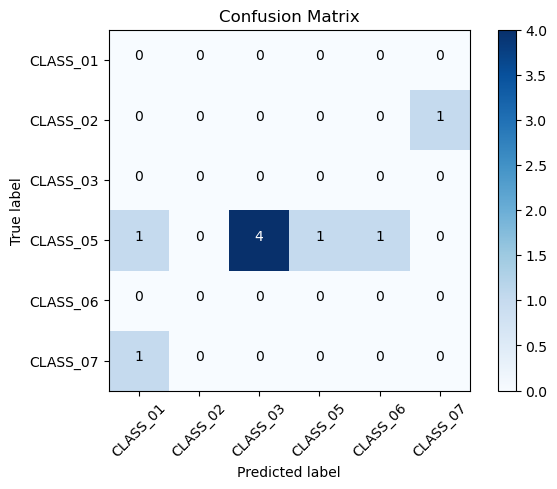

In [22]:
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')
